In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
def neuron(inputs,weights,bias): 
    return np.dot(weights,inputs)+bias
    

In [3]:
def threshold(z):
    return np.where(z>=0,1,0)
def sigmoid(z): 
    return 1/(1+np.exp(-z))
def tanh(z): 
    return np.tanh(z)
def relu(z): 
    return np.maximum(0,z)
def leaky_relu(z,alpha=0.01): 
    return np.where(z>0,z,alpha*z)
def softmax(z): 
    exp_z=np.exp(z-np.max(z))
    return exp_z/exp_z.sum(axis=0,keepdims=True)


In [4]:
inputs=np.array([0.5,0.8])
weights=np.array([0.5,-0.6])
bias=0.2
z=neuron(inputs,weights,bias)

In [5]:
threshold_output=threshold(z) 
sigmoid_output=sigmoid(z) 
tanh_output=tanh(z) 
relu_output=relu(z) 
leaky_relu_output=leaky_relu(z) 
softmax_output=softmax(np.array([z,z+0.1]))

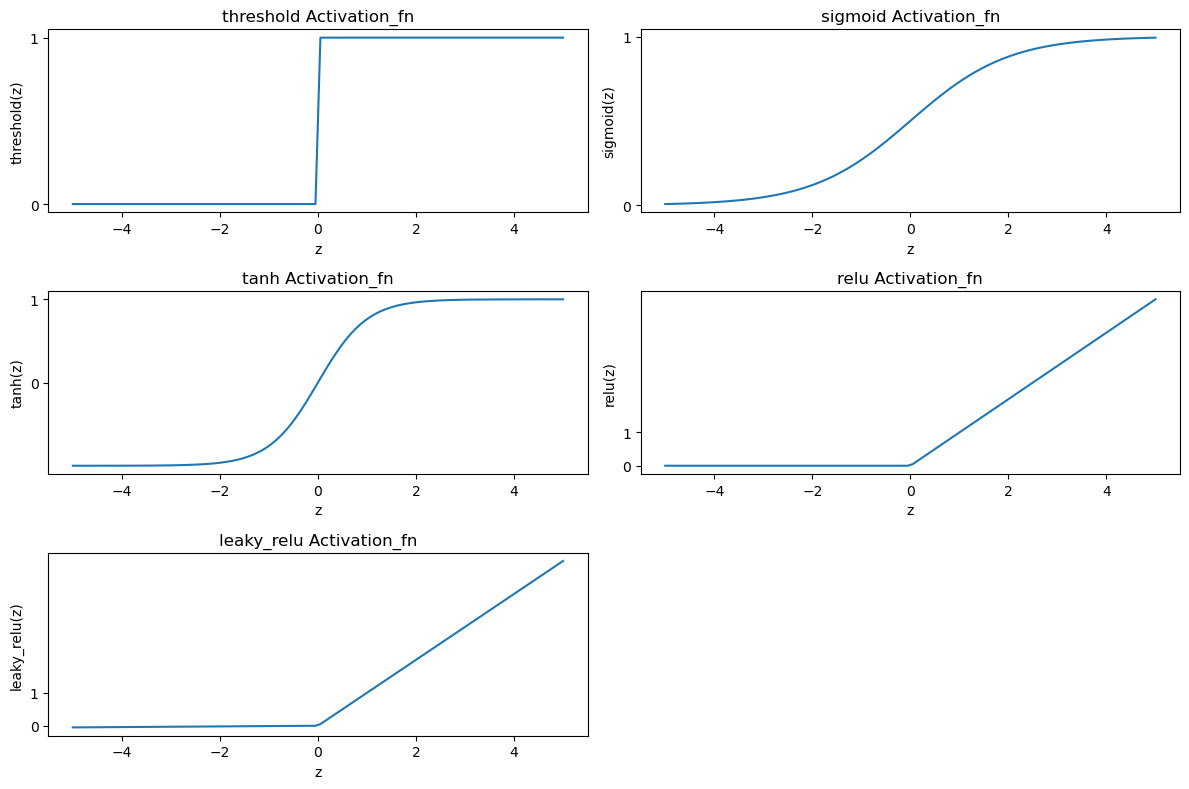

In [6]:
x=np.linspace(5,-5,100)
threshold_y=threshold(x)
sigmoid_y=sigmoid(x)
tanh_y=tanh(x)
relu_y=relu(x)
leaky_relu_y=leaky_relu(x)
plt.figure(figsize=(12,8))
plt.subplot(3,2,1)
plt.plot(x,threshold_y)
plt.title('threshold Activation_fn')
plt.xlabel('z')
plt.ylabel('threshold(z)')
plt.yticks([0,1])


plt.subplot(3,2,2)
plt.plot(x,sigmoid_y)
plt.title('sigmoid Activation_fn')
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.yticks([0,1])


plt.subplot(3,2,3)
plt.plot(x,tanh_y)
plt.title('tanh Activation_fn')
plt.xlabel('z')
plt.ylabel('tanh(z)')
plt.yticks([0,1])


plt.subplot(3,2,4)
plt.plot(x,relu_y)
plt.title('relu Activation_fn')
plt.xlabel('z')
plt.ylabel('relu(z)')
plt.yticks([0,1])


plt.subplot(3,2,5)
plt.plot(x,leaky_relu_y)
plt.title('leaky_relu Activation_fn')
plt.xlabel('z')
plt.ylabel('leaky_relu(z)')
plt.yticks([0,1])
plt.tight_layout()
plt.show()

In [7]:
import numpy as np 
x=np.array([1.0,0.5])
w=np.array([
    [0.2,0.4],
    [0.6,0.9]
])
b=np.array([0.1,0.2])
def relu(z): 
    return np.maximum(0,z)
z=np.dot(w,x)+b 
output=relu(z)
print('net input',z)
print('output',output)


net input [0.5  1.25]
output [0.5  1.25]


In [8]:
import numpy as np 
x=np.array([1.0,0.5])
w=np.array([
    [0.2,0.4],
    [0.6,0.9]
])
b=np.array([0.1,0.2])
w1=np.array([0.3,0.8])
b1=np.array([0.05])

def relu(z): 
    return np.maximum(0,z)
z=np.dot(w,x)+b 
output=relu(z)
def sigmoid(z): 
    return 1/(1+np.exp(-z))
z1=np.dot(w1,output)+b1
output1=sigmoid(z1)
print('net input',z)
print('output',output)
print('net input',z1)
print('output',output1)


net input [0.5  1.25]
output [0.5  1.25]
net input [1.2]
output [0.76852478]


In [21]:
import numpy as np 
import matplotlib.pyplot as plt 
np.random.seed(42)
print('numpy version:',np.__version__)

numpy version: 2.1.3


In [22]:
X = np.array([
    [0.1, 0.2, 0.3],
    [0.5, 0.4, 0.1],
    [0.9, 0.7, 0.2],
    [0.2, 0.9, 0.8],
    [0.6, 0.1, 0.4],
    [0.3, 0.5, 0.7]
])

y = np.array([
    [0.2, 0.1],
    [0.6, 0.3],
    [1.0, 0.5],
    [0.9, 0.8],
    [0.55, 0.25],
    [0.75, 0.6]
])

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (6, 3)
y shape: (6, 2)


In [23]:
def sigmoid(z): 
    return 1/(1+np.exp(-z))
def sigmoid_derivative(a): 
    return a*(1-a) 
print('sigmoid(0)',sigmoid(0))

sigmoid(0) 0.5


In [24]:
n_inputs=3
n_neurons=2
w=np.random.randn(n_inputs,n_neurons)*0.1
b=np.zeros((n_neurons,))
print('w shape',w.shape)
print('b shape',b.shape)

w shape (3, 2)
b shape (2,)


In [25]:
def forward(X,w,b): 
    return sigmoid(X.dot(w)+b) 
print('forward shape test:',forward(np.zeros((1,3)),w,b).shape)

forward shape test: (1, 2)


In [26]:
def mse_loss(y_true,y_pred): 
    return np.mean((y_true-y_pred)**2)
def compute_gradients(X,y_true,w,b): 
    n=X.shape[0]
    z=X.dot(w)+b 
    a=sigmoid(z)
    dl_da=(2.0/n)*(a-y_true)
    da_dz=sigmoid_derivative(a) 
    dl_dz=dl_da*da_dz
    dw=X.T.dot(dl_dz)
    db=np.sum(dl_dz,axis=0)
    return dw,db 
print('gradient shape test:')
print(compute_gradients(X,y,w,b)[0].shape,compute_gradients(X,y,w,b)[1].shape)

gradient shape test:
(3, 2) (2,)


In [15]:
# Training loop

In [30]:
def train(X,y,w,b,epochs=500,lr=0.3): 
    losses=[] 
    for epoch in range(1,epochs+1): 
        y_pred=forward(X,w,b)
        loss=mse_loss(y,y_pred)
        losses.append(loss)
        dw,db=compute_gradients(X,y,w,b)
        w-=lr*dw 
        b-=lr*db 
    return w,b,losses
w_trained,b_trained,losses=train(X,y,w.copy(),b.copy(),epochs=1200,lr=0.25)
print('final loss',losses[-1])

final loss 0.00549900589743433


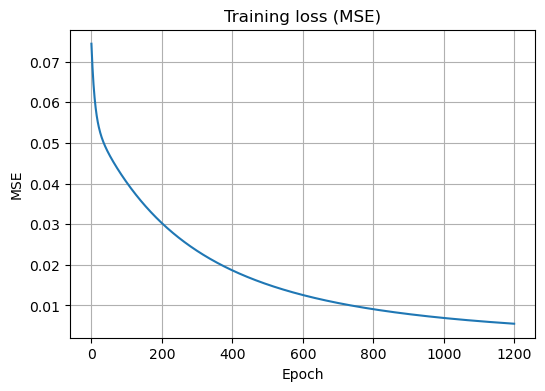

In [31]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(6,4))
plt.plot(losses)
plt.title('Training loss (MSE)')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.grid(True)
plt.show()

In [33]:
y_pred_final=forward(X,w_trained,b_trained)
print('True y:\n',y)
print('\np Predicted y(rounded):\n',np.round(y_pred_final,4))
print('\n Mean Absolute error per output neuron:',np.mean(np.abs(y-y_pred_final),axis=0))

True y:
 [[0.2  0.1 ]
 [0.6  0.3 ]
 [1.   0.5 ]
 [0.9  0.8 ]
 [0.55 0.25]
 [0.75 0.6 ]]

p Predicted y(rounded):
 [[0.3489 0.252 ]
 [0.6221 0.2946]
 [0.8924 0.4977]
 [0.8547 0.7747]
 [0.5365 0.242 ]
 [0.7    0.5444]]

 Mean Absolute error per output neuron: [0.06458615 0.04142457]


Predictions:
[[0.]
 [1.]
 [1.]
 [0.]]


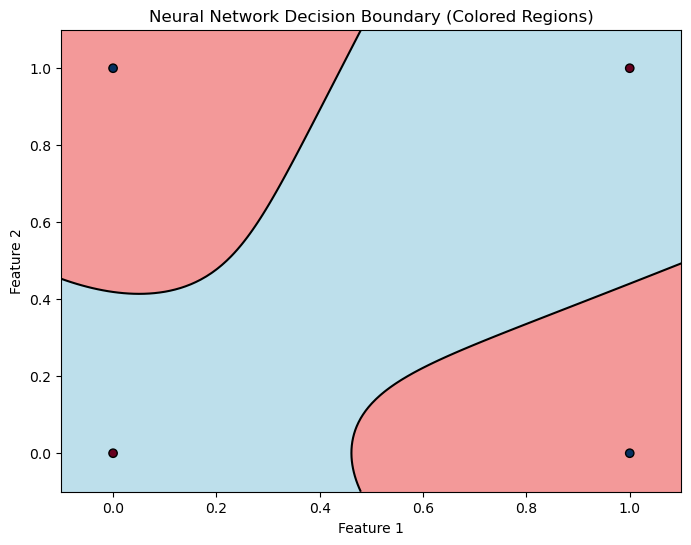

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Dummy data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input features
y = np.array([[0], [1], [1], [0]])  # Target labels (XOR)

# Initialize weights and biases
input_neurons = 2
hidden_neurons = 3
output_neurons = 1

weights_hidden = np.random.uniform(size=(input_neurons, hidden_neurons))
bias_hidden = np.random.uniform(size=(1, hidden_neurons))
weights_output = np.random.uniform(size=(hidden_neurons, output_neurons))
bias_output = np.random.uniform(size=(1, output_neurons))

# Hyperparameters
learning_rate = 0.1
epochs = 10000

# Training loop
for epoch in range(epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X, weights_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_output) + bias_output
    output_layer_output = sigmoid(output_layer_input)

    # Backpropagation
    error = y - output_layer_output
    output_delta = error * sigmoid_derivative(output_layer_output)

    hidden_error = output_delta.dot(weights_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_output += hidden_layer_output.T.dot(output_delta) * learning_rate
    bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
    weights_hidden += X.T.dot(hidden_delta) * learning_rate
    bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

# Print predictions after training
hidden_layer_input = np.dot(X, weights_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, weights_output) + bias_output
output_layer_output = sigmoid(output_layer_input)

print("Predictions:")
print(np.round(output_layer_output))

# Plotting the decision boundary with colored regions
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = sigmoid(np.dot(sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], weights_hidden) + bias_hidden), weights_output) + bias_output)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=['lightblue', 'lightcoral'], alpha=0.8) #Colored regions
plt.contour(xx, yy, Z, levels=[0.5], colors='black') # Boundary line
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.RdBu, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Neural Network Decision Boundary (Colored Regions)')
plt.show()